# LIMPIEZA DE DATOS

In [38]:
import warnings
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [39]:

from utils.funciones import data_report

### LEEMOS EL ARCHIVO

In [40]:
ruta = '../data/raw/train.csv'
df = pd.read_csv(ruta)

### EXPLORACION DE DATOS

In [41]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [42]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
5846,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [44]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,5847.000000,5847,5847,5847.000000,5.847000e+03,5847,5847,5847,5845,5811,5811,5809.000000,815,5847.000000
unique,NaN,1804,11,NaN,NaN,3,2,4,419,140,361,NaN,534,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,762,NaN,NaN,3161,4135,4811,172,602,235,NaN,6,NaN
mean,3013.181461,NaN,NaN,2013.448435,5.841013e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.286452,NaN,9.653742
std,1736.398890,NaN,NaN,3.194949,9.237971e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.806668,NaN,11.275966
min,1.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.440000
25%,1509.500000,NaN,NaN,2012.000000,3.346750e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.550000
50%,3015.000000,NaN,NaN,2014.000000,5.257600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.750000
75%,4517.500000,NaN,NaN,2016.000000,7.249050e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,10.250000


In [45]:
df.isna().sum()/len(df)*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.034206
Engine                0.615700
Power                 0.615700
Seats                 0.649906
New_Price            86.061228
Price                 0.000000
dtype: float64

In [46]:
data_report(df=df)

COL_N,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
DATA_TYPE,int64,object,object,int64,int64,object,object,object,object,object,object,float64,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.62,0.62,0.65,86.06,0.0
UNIQUE_VALUES,5847,1804,11,22,3019,3,2,4,419,140,361,8,534,1366
CARDIN (%),100.0,30.85,0.19,0.38,51.63,0.05,0.03,0.07,7.17,2.39,6.17,0.14,9.13,23.36


Evidenciamos por medio del anterior cuadro que la cardinalidad de la colomna 'Unnamed: 0' es del 100%, lo que nos da via libre para eliminarla.

In [47]:
#Eliminamos variable con cardinalidad 100%

df = df.drop(columns='Unnamed: 0', axis=1)

Verificamos la cantidad de NaNs que tiene cada una de las variables

In [17]:
df.isna().sum()/len(df)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.034206
Engine                0.615700
Power                 0.615700
Seats                 0.649906
New_Price            86.061228
Price                 0.000000
dtype: float64

La variable New_Price tiene un 86% de valores NaNs, lo que nos permite tambien eliminarla de nuestro DataSet

In [18]:
df = df.drop(columns='New_Price', axis=1)

### EDA

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5847 non-null   object 
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  Price              5847 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 548.3+ KB


Definimos porgrupoes las variables entre Categoricas y Numericas

In [26]:
var_categoricas =['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power']
var_numericas = ['Year', 'Kilometers_Driven', 'Seats', 'price']

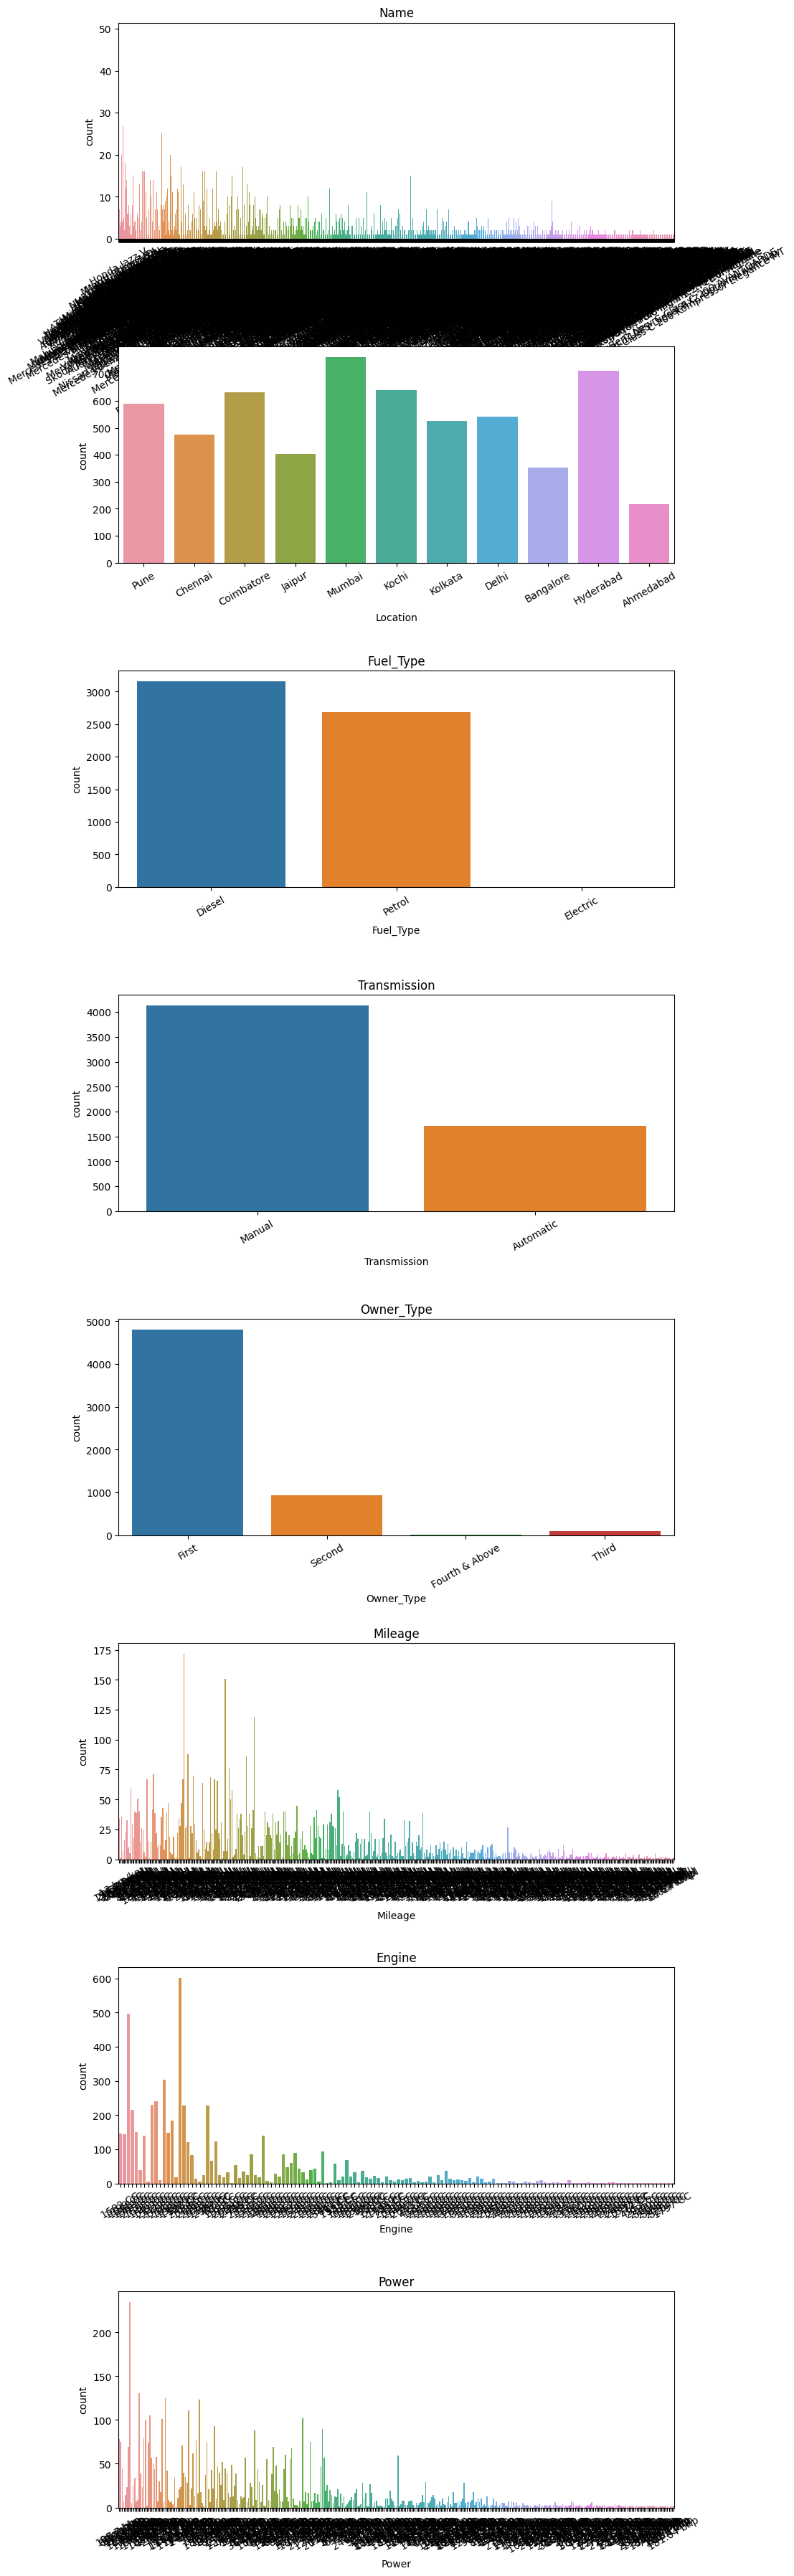

In [29]:
# Generamos graficos de barras para las variables categoricas

fig, ax = plt.subplots(nrows=len(var_categoricas), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_categoricas):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [35]:
df[df['Price']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


ValueError: Could not interpret value `price` for parameter `x`

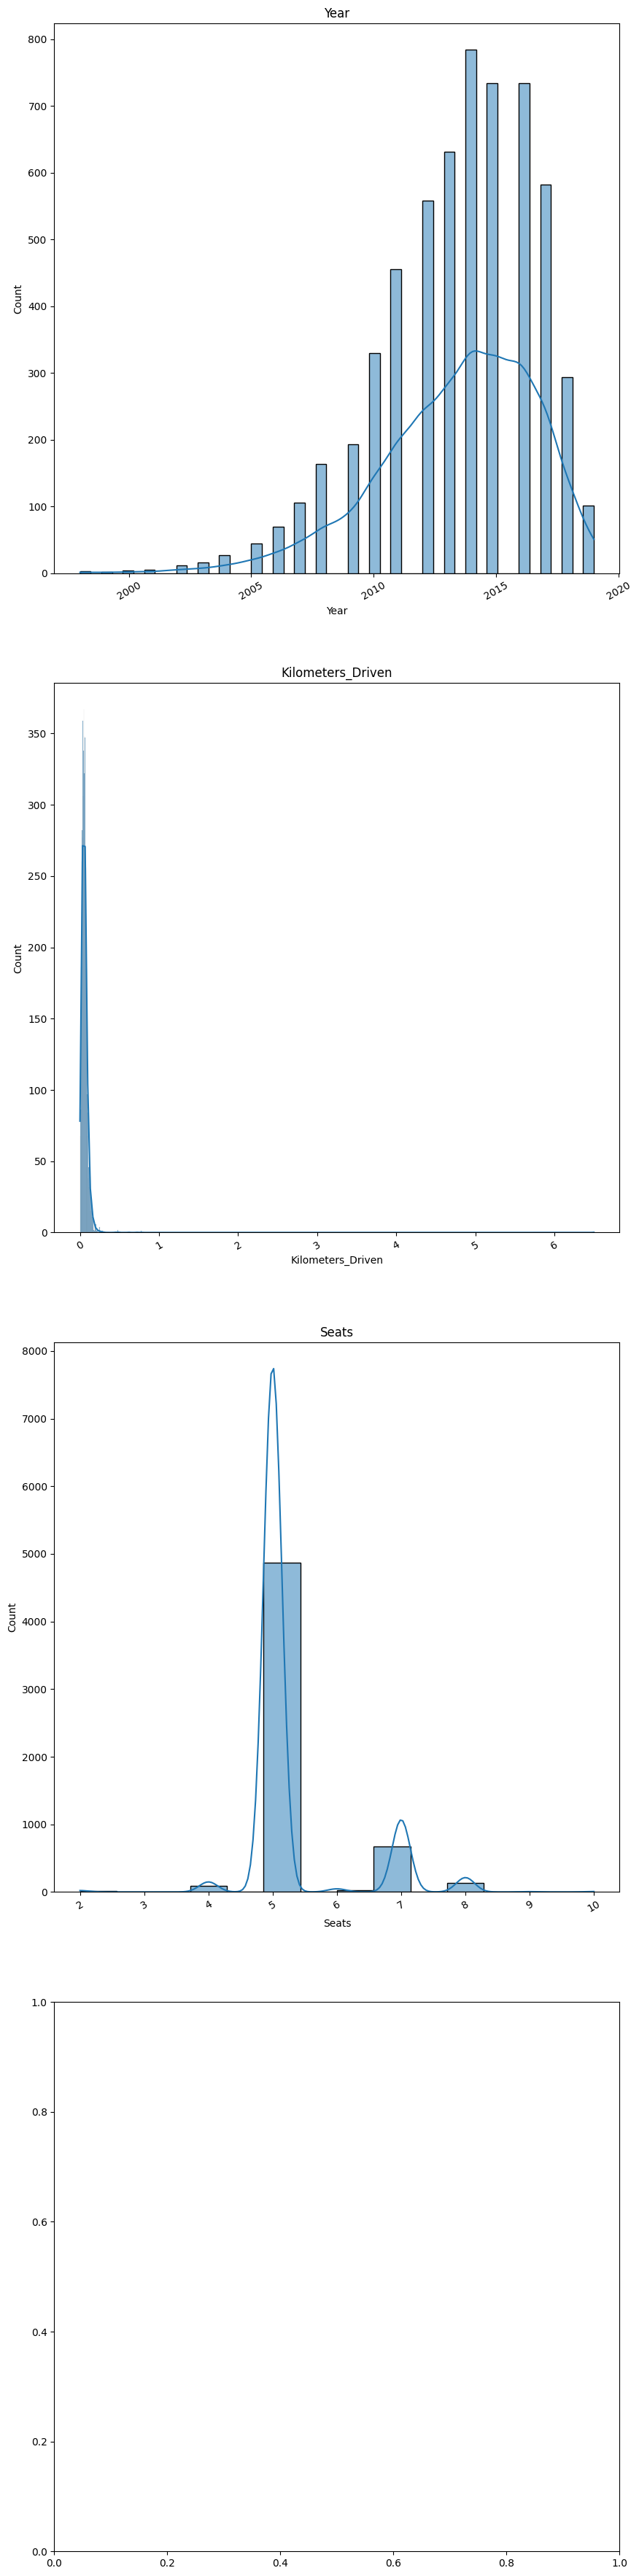

In [33]:
# Generamos histogramas para las variables numericas

fig, ax = plt.subplots(nrows=len(var_numericas), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.2)

for i, col in enumerate(var_numericas):
    sns.histplot(x=col, data=df, ax=ax[i], kde=True)
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [34]:
df['Price'].describe()

count    5847.000000
mean        9.653742
std        11.275966
min         0.440000
25%         3.550000
50%         5.750000
75%        10.250000
max       160.000000
Name: Price, dtype: float64